In [7]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

## Motivation
    Of the 7 cell types, this is most well understood from the biological perspective. As a result, here is an opportunity to use existing knowledge hone the right methods. Variables to consider:
    - TF Activity vs Expression
    - Strength of filter on expression matrix
    - Expression data: Log transform or not; Batch corrected data or not
    - Prior filtering: using DamID, honing FIMO p-values

### Convert gene symbols to Gene ids

This section is taken directly from "Create TSV from Matrix"


In [8]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)
gene_sym_to_id = {}
gtf.head()

,0,1,2,3,4,5,6,7,8
0,3R,FlyBase,gene,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; gene_name ""Myo81F""; gen..."
1,3R,FlyBase,gene,722370,722621,.,-,.,"gene_id ""FBgn0085804""; gene_name ""CR41571""; ge..."
2,3R,FlyBase,gene,1031171,1031354,.,+,.,"gene_id ""FBgn0039987""; gene_name ""CR12798""; ge..."
3,3R,FlyBase,gene,1366234,1366601,.,-,.,"gene_id ""FBgn0267798""; gene_name ""CR46123""; ge..."
4,3R,FlyBase,gene,1865108,1866008,.,-,.,"gene_id ""FBgn0267797""; gene_name ""CR46122""; ge..."


In [9]:
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_sym_to_id[sym] = i

In [10]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/inputs/03_02_2018"
mat_file = 'TF_data.csv'

In [16]:
exp = pd.read_csv(os.path.join(matrices_dir, mat_file), sep=',', index_col  = 0) #sep='\t',

In [17]:
exp = exp.loc[set(gene_sym_to_id.keys()).intersection(exp.index), :]
new_index = [gene_sym_to_id[sym] for sym in exp.index]
exp.index = new_index
exp.head()

,soma_wtF_AAACCTGTCCGCAGTG,soma_wtF_AAAGTAGCAGACGCAA,soma_wtF_AACGTTGTCTCCAACC,soma_wtF_AACTCCCAGTGCCAGA,soma_wtF_AAGACCTTCTCTGCTG,soma_wtF_AAGTCTGTCCCTGACT,soma_wtF_AATCCAGGTTATTCTC,soma_wtF_ACACCAAAGCTTCGCG,soma_wtF_ACACCAATCACCGGGT,soma_wtF_ACGCAGCGTCGACTAT,...,soma_wtJ_TGACAACGTACGACCC,soma_wtJ_TGACTTTCAGACGCTC,soma_wtJ_TGCACCTCAAGCTGGA,soma_wtJ_TGCACCTTCACAACGT,soma_wtJ_TGCCAAACATTCGACA,soma_wtJ_TGGCGCACAGCATGAG,soma_wtJ_TGGCGCACAGCCACCA,soma_wtJ_TGTCCCATCCAATGGT,soma_wtJ_TTCGGTCAGAGCTGCA,soma_wtJ_TTGTAGGGTTGGACCC
FBgn0039266,0.498776,0.452943,1.054567,0.815635,1.438181,1.183812,1.768935,0.582660,0.000000,0.694852,...,1.405993,0.655051,0.817161,1.510867,1.156705,0.776139,1.060832,0.451694,1.664950,0.516844
FBgn0039265,1.078449,1.490115,1.054567,0.815635,1.144865,1.343779,0.963760,0.333179,0.568313,0.000000,...,0.479902,1.047488,1.063363,0.000000,0.546085,1.207805,0.903831,0.451694,0.000000,0.855884
FBgn0030674,0.000000,0.452943,0.000000,0.609987,0.728035,0.448972,0.000000,0.333179,0.000000,0.000000,...,0.000000,0.000000,0.489825,0.000000,0.000000,0.330039,0.190508,0.998024,0.728202,0.855884
FBgn0033788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FBgn0033792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
row_medians = exp.median(axis=1)

In [22]:
row_means = exp.mean(axis=1)

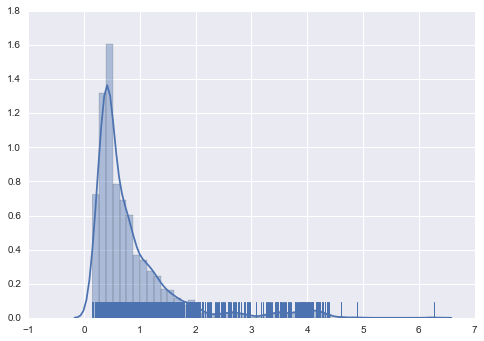

In [26]:
sns.distplot(row_medians[row_medians != 0], rug=True);

In [25]:
filtered_exp = exp[row_medians != 0]

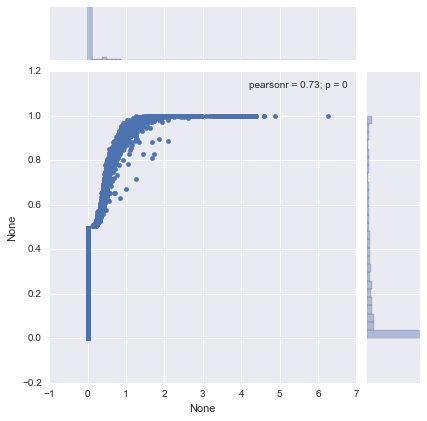

In [27]:
filtered_exp.shape

(2317, 175)

In [28]:
# Filter for 95% non-zero

In [55]:
percent_nonzero = (exp > 0).sum(axis = 1) / exp.shape[1]
percent_nonzero_filter = .95

In [128]:
num_genes_above_filter = []
increment = .001
cutoffs = [i * increment for i in range(1005) if i * increment <= 1]
for i in cutoffs:
    num_genes_above_filter.append(percent_nonzero[percent_nonzero > i].shape[0])
    

In [129]:
cutoffs[0]

0.0

In [130]:
num_genes_above_filter_downsampled = []
increment = .1
cutoffs_downsampled = [i * increment for i in range(200) if (i * increment < 1 and  i * increment > .3)  ]
for i in cutoffs_downsampled:
    num_genes_above_filter_downsampled.append(percent_nonzero[percent_nonzero > i].shape[0])
    

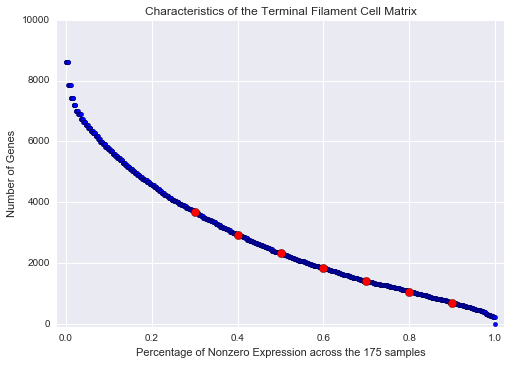

In [132]:
plt.scatter(cutoffs, num_genes_above_filter)
plt.scatter(cutoffs_downsampled, num_genes_above_filter_downsampled, c='red', s =70)
plt.xlabel('Percentage of Nonzero Expression across the {} samples'.format(exp.shape[1]))
plt.ylabel('Number of Genes')
plt.title('Characteristics of the Terminal Filament Cell Matrix')
plt.ylim( (-100, 10000) )
plt.xlim((-.02, 1.02))
plt.show()

In [137]:
# Save samples of the filter to disk for inferelator runs
for i in cutoffs_downsampled:
    temp_exp = exp[percent_nonzero > i]
    filename = 'expression_filtered_at_a_fraction_of_{}_nonzero_samples.tsv'.format(i)
    temp_exp.to_csv(os.path.join(matrices_dir, filename), sep='\t', index_col  = 0)
    print 'Rows at a fraction of {}: {}'.format(i, temp_exp.shape[0])

Rows at a fraction of 0.3: 3687
Rows at a fraction of 0.4: 2919
Rows at a fraction of 0.5: 2317
Rows at a fraction of 0.6: 1821
Rows at a fraction of 0.7: 1404
Rows at a fraction of 0.8: 1058
Rows at a fraction of 0.9: 696


In [139]:
temp_exp.head()

,soma_wtF_AAACCTGTCCGCAGTG,soma_wtF_AAAGTAGCAGACGCAA,soma_wtF_AACGTTGTCTCCAACC,soma_wtF_AACTCCCAGTGCCAGA,soma_wtF_AAGACCTTCTCTGCTG,soma_wtF_AAGTCTGTCCCTGACT,soma_wtF_AATCCAGGTTATTCTC,soma_wtF_ACACCAAAGCTTCGCG,soma_wtF_ACACCAATCACCGGGT,soma_wtF_ACGCAGCGTCGACTAT,...,soma_wtJ_TGACAACGTACGACCC,soma_wtJ_TGACTTTCAGACGCTC,soma_wtJ_TGCACCTCAAGCTGGA,soma_wtJ_TGCACCTTCACAACGT,soma_wtJ_TGCCAAACATTCGACA,soma_wtJ_TGGCGCACAGCATGAG,soma_wtJ_TGGCGCACAGCCACCA,soma_wtJ_TGTCCCATCCAATGGT,soma_wtJ_TTCGGTCAGAGCTGCA,soma_wtJ_TTGTAGGGTTGGACCC
FBgn0039266,0.498776,0.452943,1.054567,0.815635,1.438181,1.183812,1.768935,0.582660,0.000000,0.694852,...,1.405993,0.655051,0.817161,1.510867,1.156705,0.776139,1.060832,0.451694,1.664950,0.516844
FBgn0051715,0.498776,1.490115,1.452499,1.131730,0.728035,0.757718,0.732859,0.782162,0.928446,1.100884,...,1.046528,0.655051,1.425553,0.777895,1.362494,0.941603,1.370696,0.998024,0.000000,0.516844
FBgn0004907,2.843025,3.125510,2.770453,2.991180,2.702910,3.115053,3.142468,2.490817,2.692947,2.642220,...,2.634348,2.699925,3.167714,2.826601,3.060651,3.113792,2.854708,2.726171,2.837339,2.885816
FBgn0046214,1.709633,1.351877,1.336605,1.472845,2.139720,1.481651,1.857097,1.935999,1.574108,1.948830,...,1.546603,2.232931,1.690874,2.398216,1.678755,1.867842,1.928063,1.349334,1.438426,1.621438
FBgn0083167,1.078449,1.817494,1.736393,1.929032,1.438181,1.602797,0.963760,1.748290,1.401465,1.388850,...,1.046528,0.000000,1.990653,1.210086,1.362494,1.417836,1.315933,1.608798,0.728202,1.108623


In [86]:
joint_df = pd.DataFrame([percent_nonzero, row_medians]).transpose()

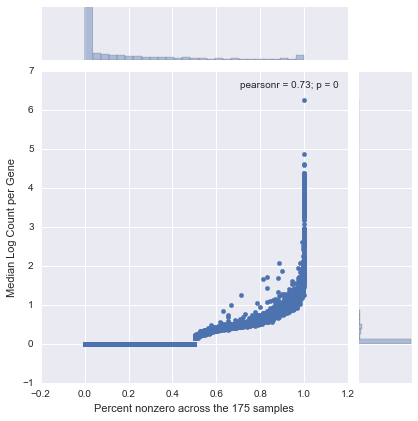

In [91]:
joint_df.columns = ['Percent nonzero across the {} samples'.format(exp.shape[1]), 'Median Log Count per Gene']
sns.jointplot(joint_df.columns[0], joint_df.columns[1], joint_df)
plt.show()

In [140]:
from inferelator_ng.bbsr_tfa_workflow import BBSR_TFA_Workflow

workflow = BBSR_TFA_Workflow()
# Common configuration parameters
workflow.input_dir = 'data/dmel_TF_filtered_experiment'
workflow.num_bootstraps = 20
workflow.delTmax = 110
workflow.delTmin = 0
workflow.expression_matrix_file = 'expression_filtered_at_a_fraction_of_0.3_nonzero_samples.tsv'
workflow.tau = 45
workflow.random_seed = 1
workflow.priors_file = 'prior_with_tfs_filtered_by_one_percent_expression.tsv'
workflow.run()

ImportError: No module named bbsr_tfa_workflow